# “What truly drives productivity, efficiency, and well-being in modern work environments?”

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

In [2]:
from datasets import load_dataset

dataset = load_dataset("nprak26/remote-worker-productivity")
df = dataset["train"].to_pandas()
df.head()

Found cached dataset csv (C:/Users/Mubasshira/.cache/huggingface/datasets/nprak26___csv/nprak26--remote-worker-productivity-07050047a47d7e51/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

,Employee_ID,Age,Years_Experience,WFH_Days_Per_Week,Gender,Education_Level,Marital_Status,Has_Children,Location_Type,Department,Job_Level,Company_Size,Industry,Home_Office_Quality,Internet_Speed_Category,Work_Hours_Per_Week,Manager_Support_Level,Team_Collaboration_Frequency,Productivity_Score,Task_Completion_Rate,Quality_Score,Innovation_Score,Efficiency_Rating,Meetings_Per_Week,Commute_Time_Minutes,Job_Satisfaction,Stress_Level,Work_Life_Balance,Survey_Date,Response_Quality
0,EMP0001,39,10,2,Female,Associate Degree,Married,Yes,Urban,Product,Mid-Level,Large (1001-5000),Finance,Good,Very Fast (100+ Mbps),41,Low,Few times per week,52.2,56.6,58.1,52.1,72.1,4,48,55.9,6,8,2024-04-05,Medium
1,EMP0002,33,4,5,Female,Master Degree,Married,No,Urban,Customer Success,Senior,Startup (1-50),Education,Good,Very Fast (100+ Mbps),52,Moderate,Monthly,81.5,70.8,93.3,77.9,89.5,12,0,96.1,3,8,2024-01-29,High
2,EMP0003,40,3,3,Male,PhD,Single,Yes,Rural,Operations,Mid-Level,Medium (201-1000),Technology,Excellent,Fast (50-100 Mbps),43,Moderate,Few times per week,82.2,81.9,84.7,63.2,95.0,15,24,90.4,5,6,2024-01-18,High
3,EMP0004,48,14,3,Male,Bachelor Degree,Married,Yes,Urban,Finance,Manager,Medium (201-1000),Technology,Excellent,Very Fast (100+ Mbps),45,High,Daily,75.6,70.2,67.8,82.5,95.0,8,8,100.0,10,5,2024-04-18,High
4,EMP0005,32,6,5,Male,High School,Divorced,Yes,Rural,Engineering,Senior,Small (51-200),Technology,Average,Moderate (25-50 Mbps),42,Very Low,Few times per week,98.0,98.2,86.4,67.5,95.0,10,0,100.0,3,4,2024-02-19,High


In [3]:
df.shape

(1500, 30)

# DESCRIPTIVE ANALYSIS

## Overall Picture

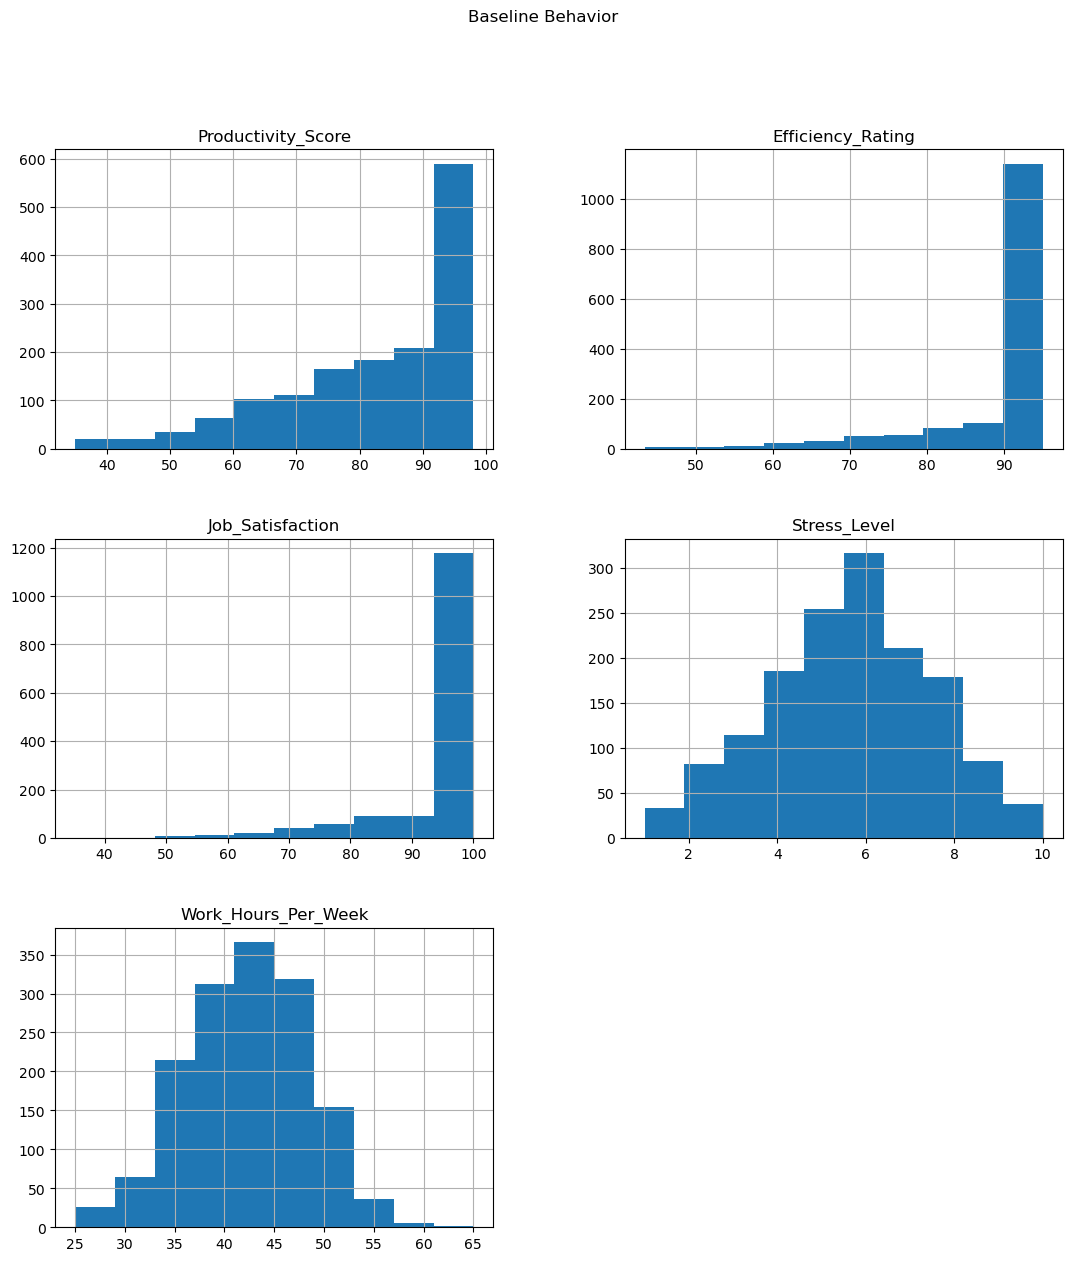

In [5]:
desc_stat = df[["Productivity_Score", "Efficiency_Rating", "Job_Satisfaction", "Stress_Level", "Work_Hours_Per_Week"]]
desc_stat.hist(figsize=(13,14))
plt.suptitle("Baseline Behavior")
plt.show()

## Remote intensity analysis

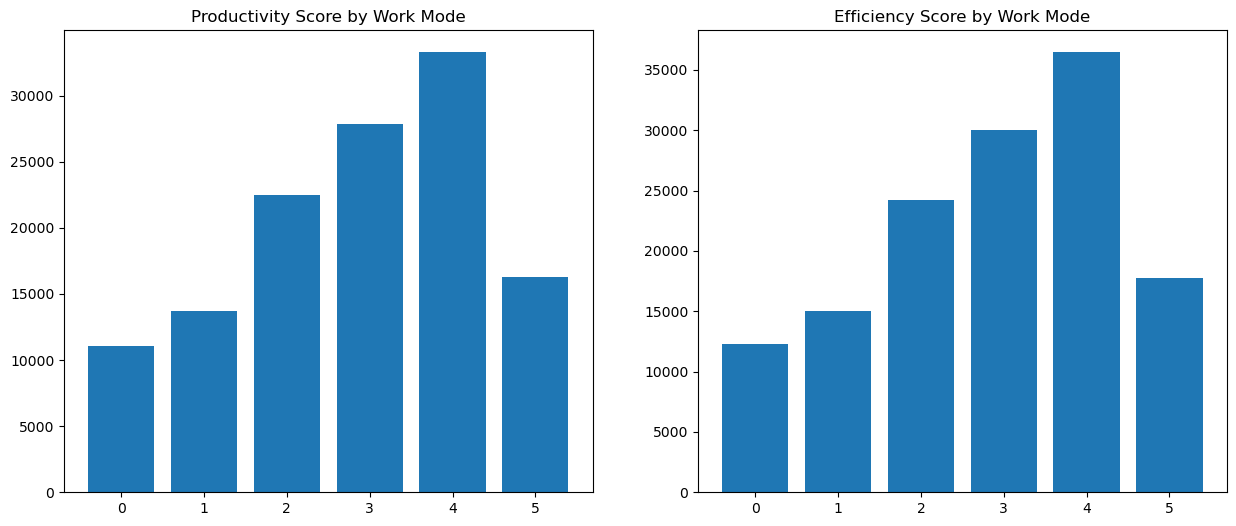

In [6]:
prod_analysis = df.groupby('WFH_Days_Per_Week')['Productivity_Score'].sum().reset_index()
eff_analysis = df.groupby('WFH_Days_Per_Week')['Efficiency_Rating'].sum().reset_index()
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.bar(x=prod_analysis['WFH_Days_Per_Week'], height=prod_analysis['Productivity_Score'])
plt.title('Productivity Score by Work Mode')

plt.subplot(1,2,2)
plt.bar(x=eff_analysis['WFH_Days_Per_Week'], height=eff_analysis['Efficiency_Rating'])
plt.title('Efficiency Score by Work Mode')


plt.show()

1) How do productivity and efficiency change as WFH days increase?
> As WFH increases productivity and efficiency also increases however whole week Home reduces both scores

2) Is there a “sweet spot” (not fully remote, not fully office)?
> There is a "Four Days WFH" Sweet spot where Productivity and Efficiency is at its maximum score

# ENVIRONMENT & SETUP IMPACT

## Home office & internet

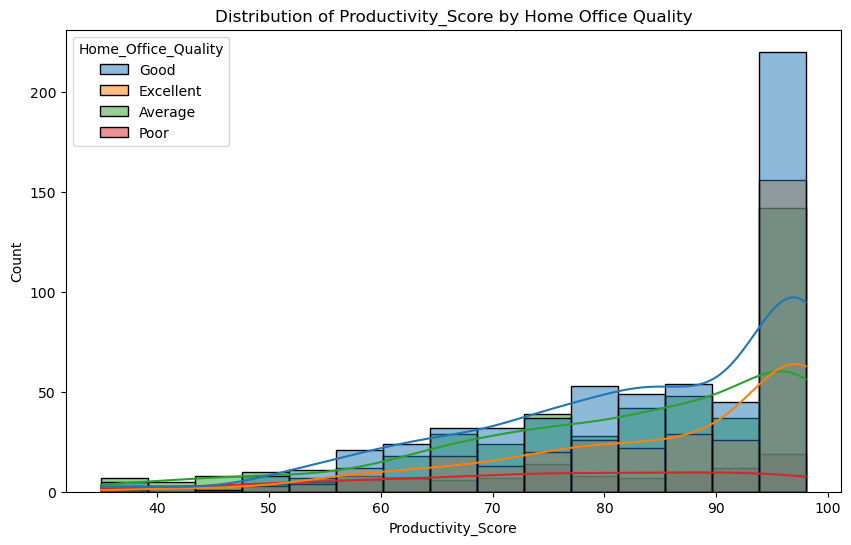

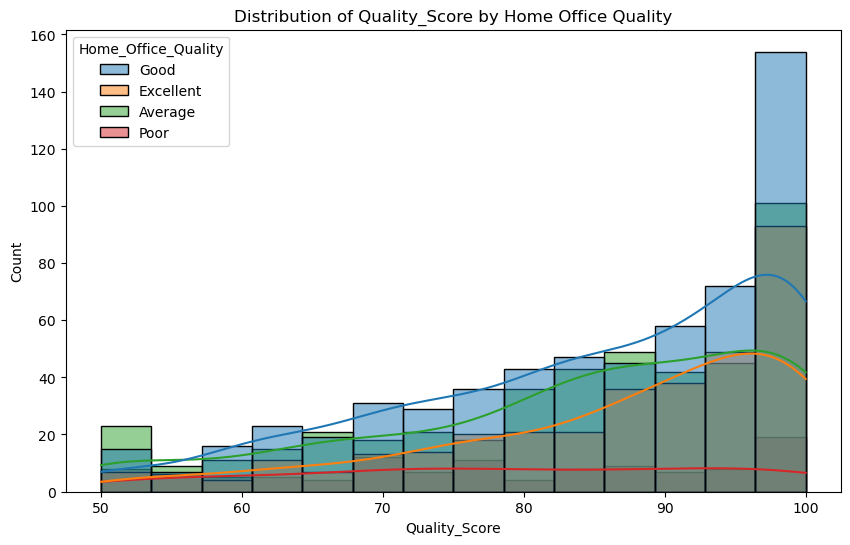

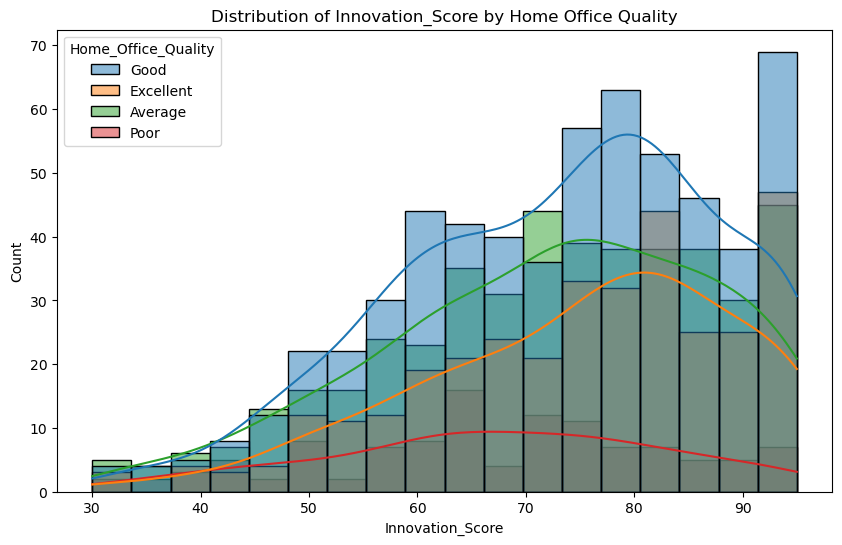

In [7]:
num_stat = df[['Productivity_Score', "Quality_Score", "Innovation_Score"]]

for col in num_stat:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=col, hue="Home_Office_Quality", kde=True)
    plt.title(f'Distribution of {col} by Home Office Quality')
    plt.show()

3) Does better infrastructure reflect in Productivity, Quality, Innovation?
> An average quality or a Good quality infrastructure reflects highly Better in all the Stats.

> The graph also depicts that an Excellent and a poor quality environment does not create better score in terms of Productivity, Quality and Innovation

## Commute vs outcomes

In [8]:
df.head(1)

,Employee_ID,Age,Years_Experience,WFH_Days_Per_Week,Gender,Education_Level,Marital_Status,Has_Children,Location_Type,Department,Job_Level,Company_Size,Industry,Home_Office_Quality,Internet_Speed_Category,Work_Hours_Per_Week,Manager_Support_Level,Team_Collaboration_Frequency,Productivity_Score,Task_Completion_Rate,Quality_Score,Innovation_Score,Efficiency_Rating,Meetings_Per_Week,Commute_Time_Minutes,Job_Satisfaction,Stress_Level,Work_Life_Balance,Survey_Date,Response_Quality
0,EMP0001,39,10,2,Female,Associate Degree,Married,Yes,Urban,Product,Mid-Level,Large (1001-5000),Finance,Good,Very Fast (100+ Mbps),41,Low,Few times per week,52.2,56.6,58.1,52.1,72.1,4,48,55.9,6,8,2024-04-05,Medium


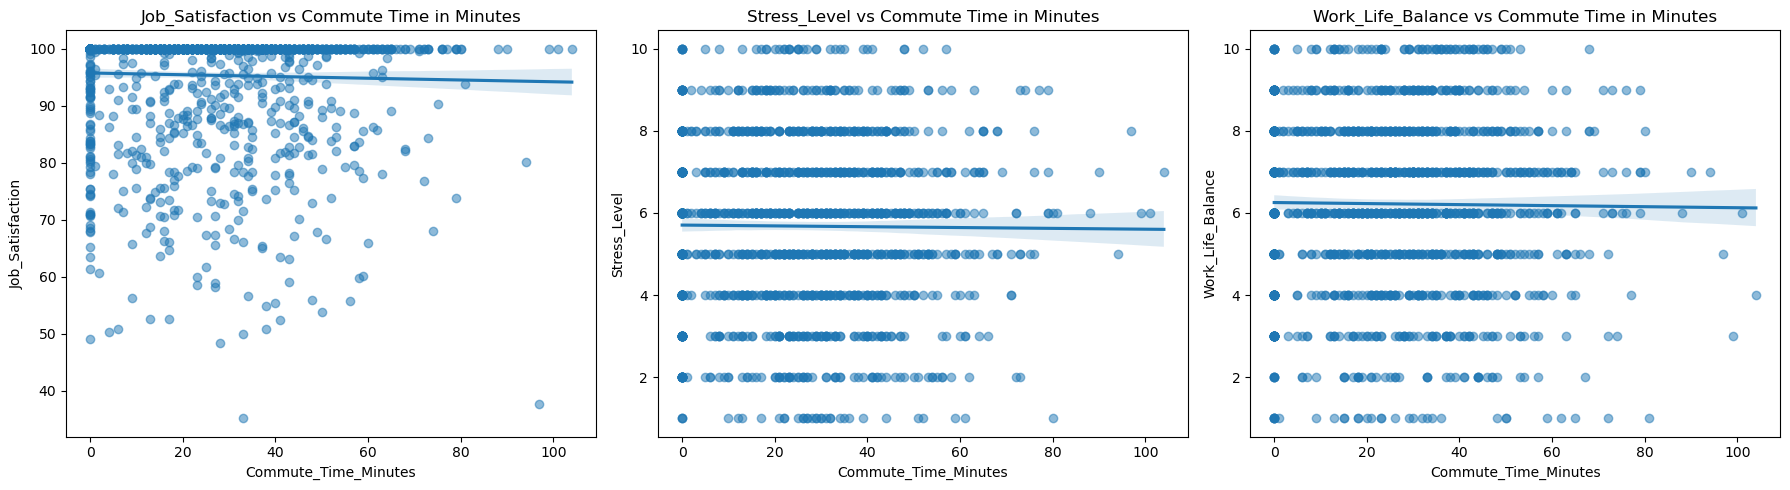

In [9]:
commute_stat = df[['Job_Satisfaction', "Stress_Level", "Work_Life_Balance"]]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(commute_stat):
    sns.regplot(data=df, x=df['Commute_Time_Minutes'], y=col, ax=axes[i], scatter_kws={'alpha':0.5})
    axes[i].set_title(f'{col} vs Commute Time in Minutes')

plt.tight_layout()
plt.show()

# CULTURE, SUPPORT & COLLABORATION

## Manager support

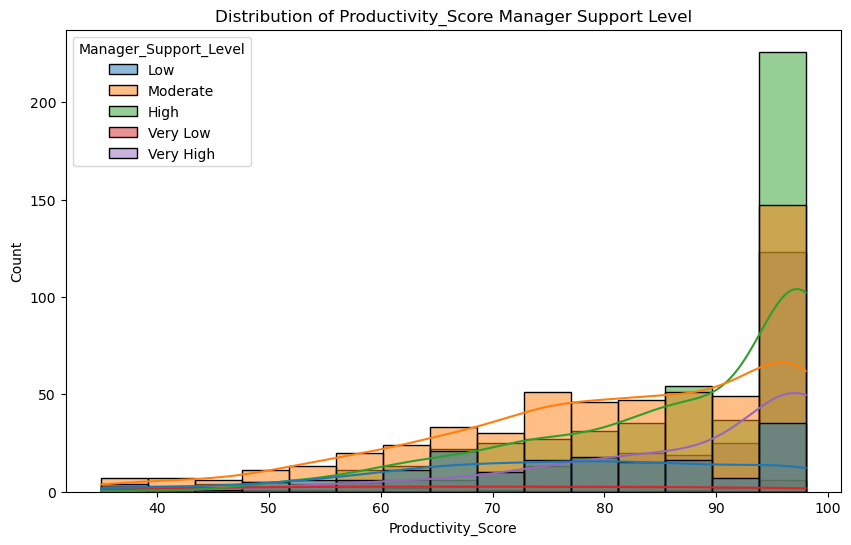

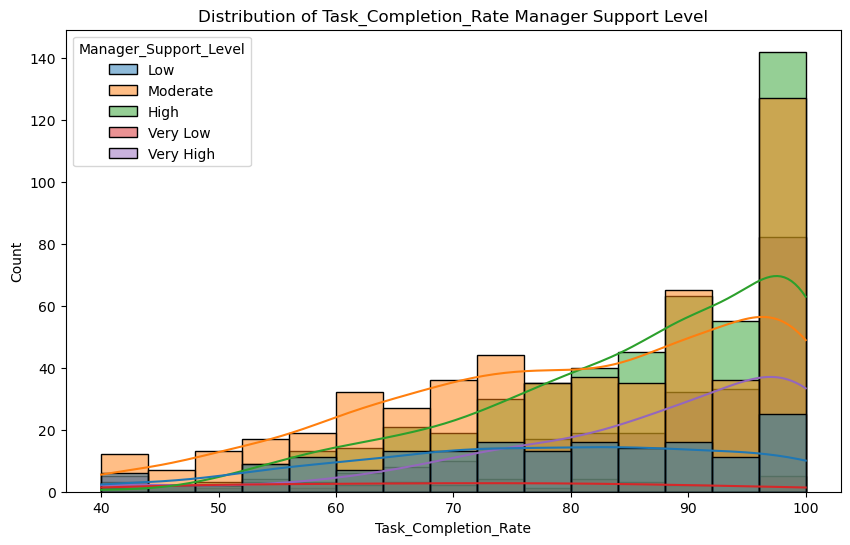

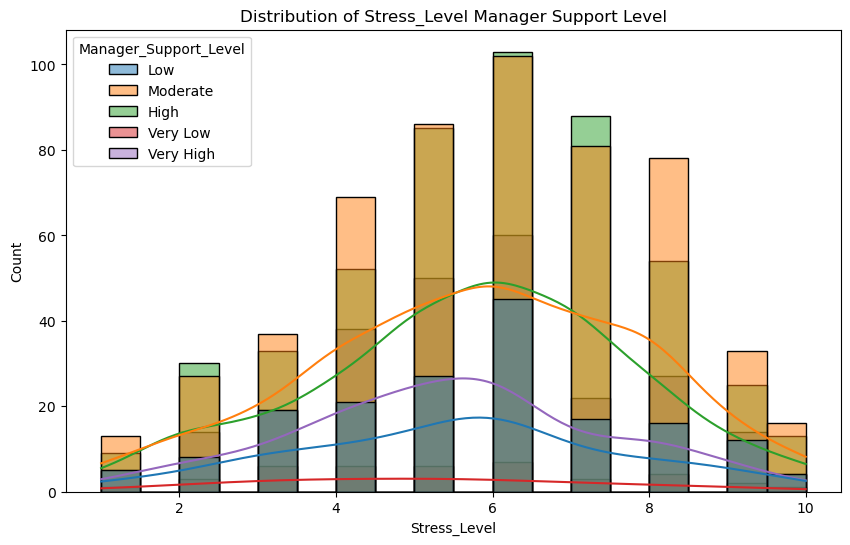

In [10]:
support_stat = df[['Productivity_Score', "Task_Completion_Rate", "Stress_Level"]]

for col in support_stat:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=col, hue="Manager_Support_Level", kde=True)
    plt.title(f'Distribution of {col} Manager Support Level')
    plt.show()

4) Does higher support improve: Productivity, Task completion and Stress?

> The histogram illustrates that higher manager support levels are strongly associated with higher employee productivity score and task completion rates

>Essentially, the visualization suggests that better manager support is associated with lower stress levels, or at least a lower likelihood of having high stress levels.

## Meetings & collaboration

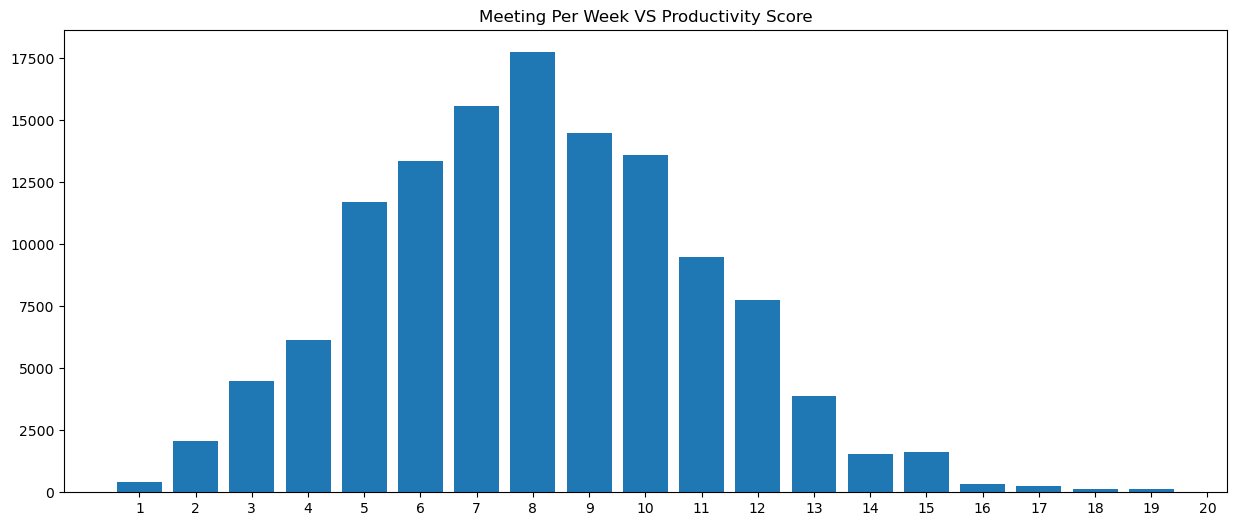

In [11]:
prod_analysis1 = df.groupby('Meetings_Per_Week')['Productivity_Score'].sum().reset_index()

plt.figure(figsize=(15,6))
plt.bar(x=prod_analysis1['Meetings_Per_Week'], height=prod_analysis1['Productivity_Score'],)
plt.xticks(np.arange(1,21,1))
plt.title('Meeting Per Week VS Productivity Score')


plt.show()

- An ideal meeting count of 7-8 meeting per week offers best productivity scores

<Axes: xlabel='Innovation_Score', ylabel='Count'>

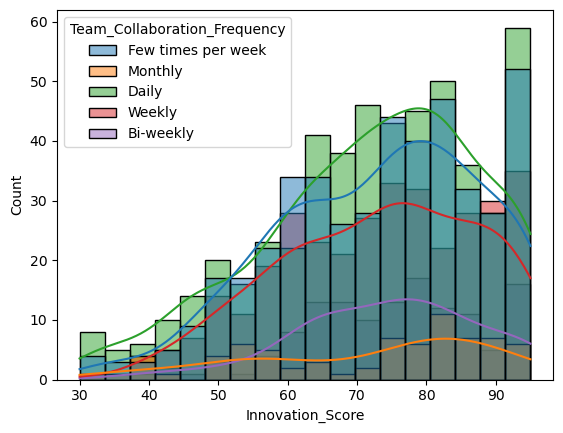

In [12]:
sns.histplot(x=df['Innovation_Score'], hue=df['Team_Collaboration_Frequency'], kde=True)

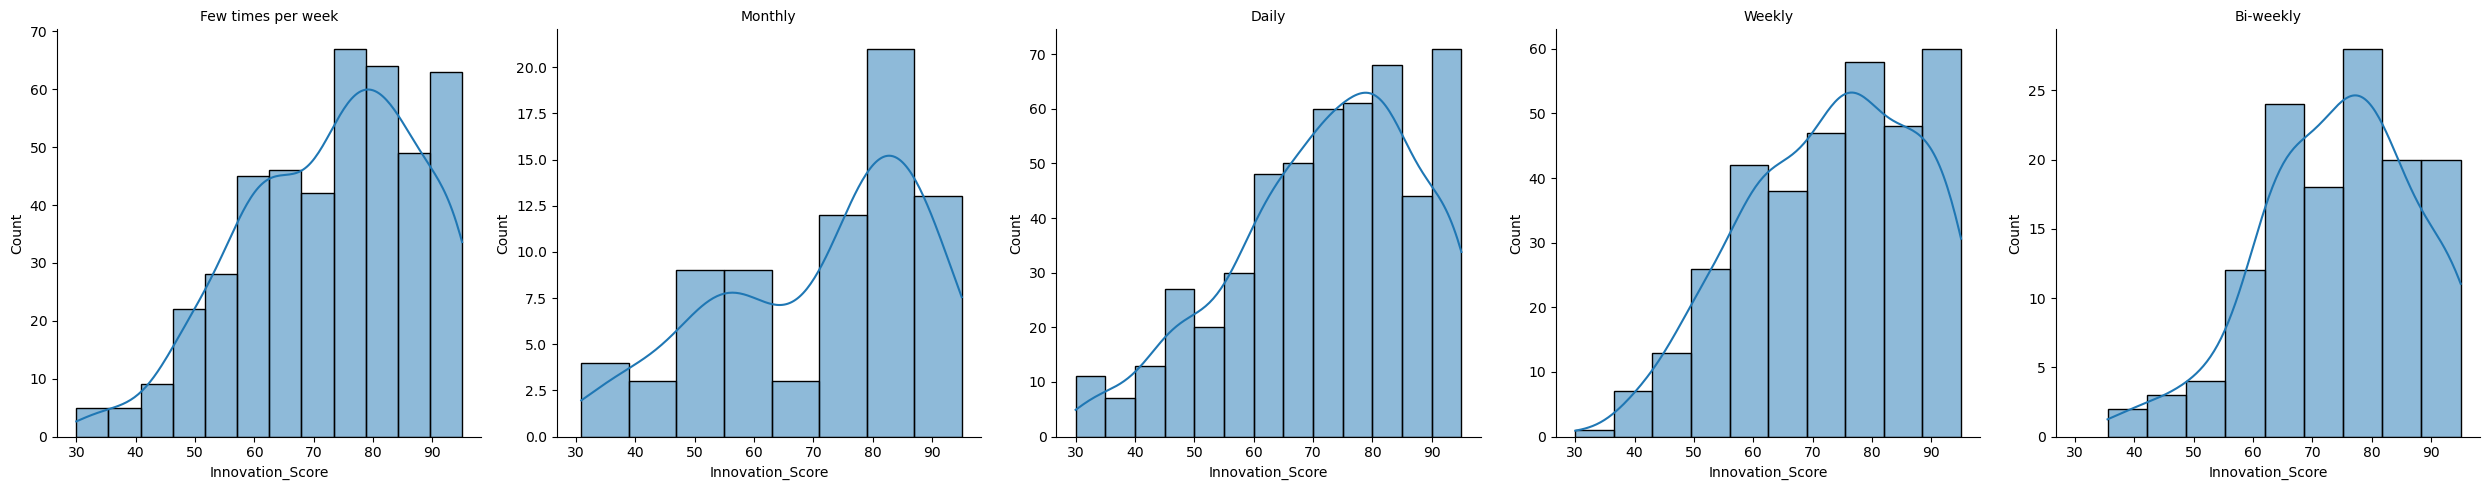

In [13]:
g = sns.FacetGrid(df, col='Team_Collaboration_Frequency', sharey=False, height=5, aspect=1)

g.map(sns.histplot, 'Innovation_Score', kde=True)

g.set_titles(col_template="{col_name}")

plt.tight_layout()
plt.show()

- Daily Collaboration with Team result in High innovation score. Followed by Few Times per week to Weekly

Key insight angle:

More interaction = more productivity

# EXPERIENCE, ROLE & EXPECTATION ALIGNMENT

## Experience curve

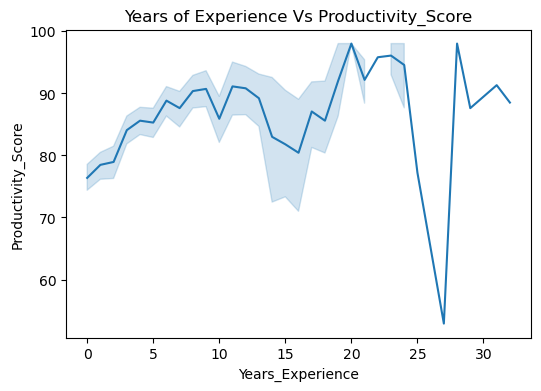

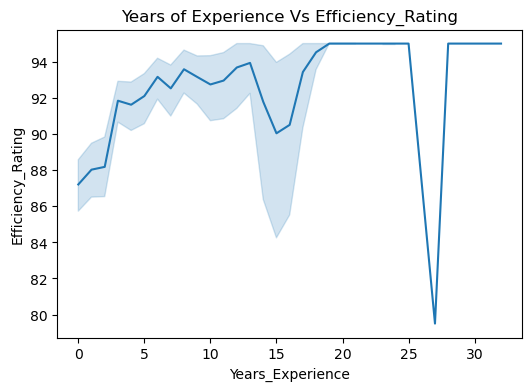

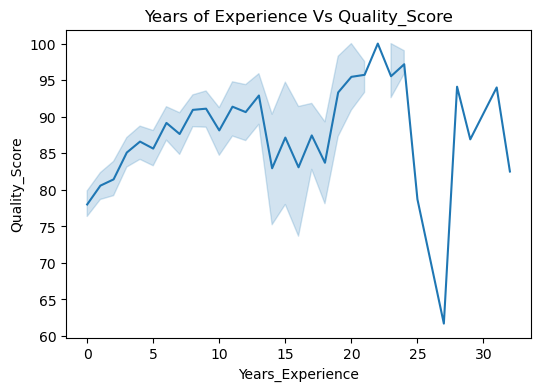

In [14]:
exp_stat = df[['Productivity_Score', "Efficiency_Rating", "Quality_Score"]]

for col in exp_stat:
    plt.figure(figsize=(6,4))
    sns.lineplot(data=df, x="Years_Experience", y = col)
    plt.title(f'Years of Experience Vs {col}')
    plt.show()

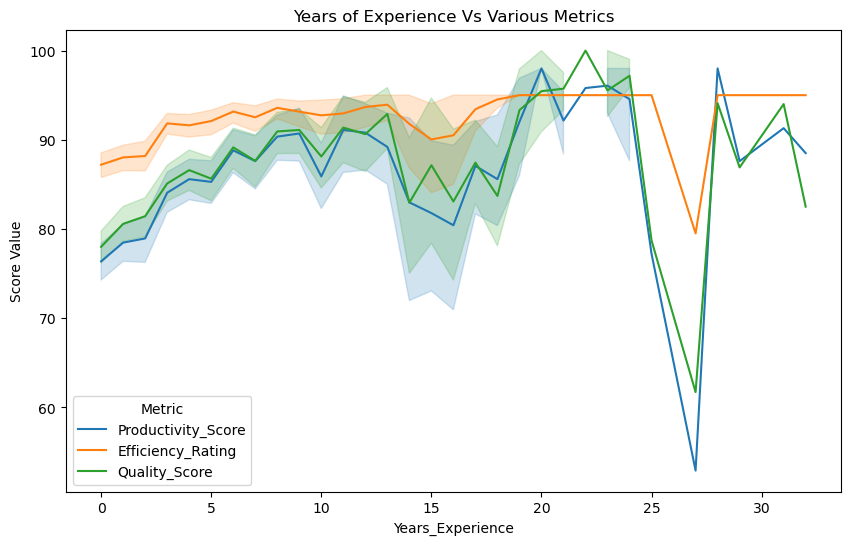

In [15]:
exp_stat = df[['Productivity_Score', "Efficiency_Rating", "Quality_Score"]]
df_long = df.melt(id_vars=['Years_Experience'], 
                  value_vars=exp_stat,
                  var_name='Metric', 
                  value_name='Score')

plt.figure(figsize=(10,6))
sns.lineplot(data=df_long, x="Years_Experience", y="Score", hue="Metric")
plt.title(f'Years of Experience Vs Various Metrics')
plt.ylabel('Score Value')
plt.show()

    

**The graph shows that all three performance metrics generally increase with experience within the first 15 years, reaching peak scores between 18 and 25 years.
Following the peak performance years, there is a sharp decline in all metrics around 26-28 years of experience, with partial recovery afterward.
Overall, the data suggests that job performance is strongly tied to experience levels, but with significant fluctuation and a notable late-career dip.**

## 🔹 Job level & department

In [16]:
df.head(1)

,Employee_ID,Age,Years_Experience,WFH_Days_Per_Week,Gender,Education_Level,Marital_Status,Has_Children,Location_Type,Department,Job_Level,Company_Size,Industry,Home_Office_Quality,Internet_Speed_Category,Work_Hours_Per_Week,Manager_Support_Level,Team_Collaboration_Frequency,Productivity_Score,Task_Completion_Rate,Quality_Score,Innovation_Score,Efficiency_Rating,Meetings_Per_Week,Commute_Time_Minutes,Job_Satisfaction,Stress_Level,Work_Life_Balance,Survey_Date,Response_Quality
0,EMP0001,39,10,2,Female,Associate Degree,Married,Yes,Urban,Product,Mid-Level,Large (1001-5000),Finance,Good,Very Fast (100+ Mbps),41,Low,Few times per week,52.2,56.6,58.1,52.1,72.1,4,48,55.9,6,8,2024-04-05,Medium


In [17]:
condition = df['WFH_Days_Per_Week']>3

In [18]:
df1 = df.copy()
df1['status'] = np.where(condition, True, False)
df1 = df1[condition]

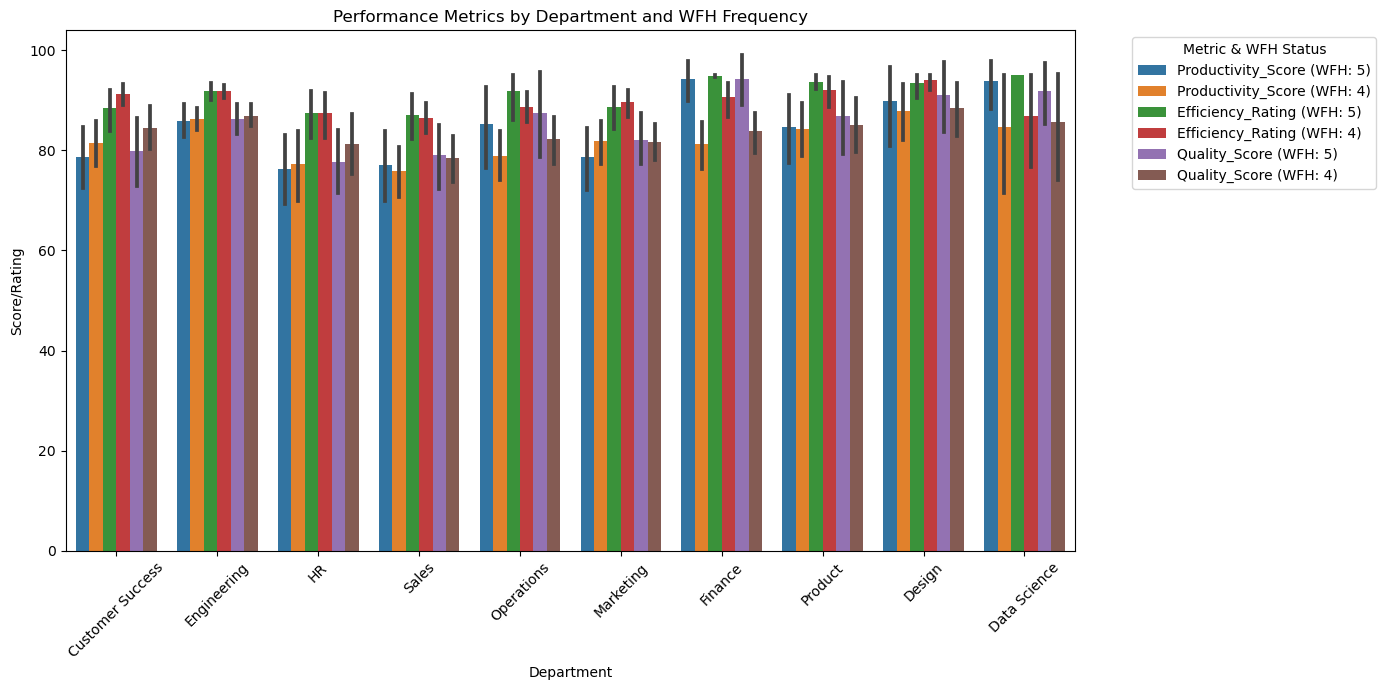

In [19]:
exp_stat = df[['Productivity_Score', "Efficiency_Rating", "Quality_Score"]]
df1_melted = df1.melt(id_vars=['Department', 'WFH_Days_Per_Week'], 
                  value_vars=exp_stat,
                  var_name='Stat', 
                  value_name='Value')

df1_melted['Group'] = df1_melted['Stat'] + " (WFH: " + df1_melted['WFH_Days_Per_Week'].astype(str) + ")"

plt.figure(figsize=(14, 7))

# Plotting
sns.barplot(
    data=df1_melted,
    x='Department',
    y='Value',
    hue='Group'
)

plt.legend(title="Metric & WFH Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Score/Rating")
plt.title("Performance Metrics by Department and WFH Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- WFH Impact: Across most departments, employees working 5 days from home consistently achieve higher Productivity Scores than those working 4 days.
- Top Performers: The Finance and Data Science departments lead the pack, maintaining the highest overall scores across productivity, efficiency, and quality metrics regardless of WFH frequency.


# Hypothesis Formulation

In [28]:
#Productivity differs based on WFH intensity
from scipy.stats import ttest_ind
df['WFH_intensity'] = np.where(df['WFH_Days_Per_Week'] < 4, 'Low', 'High')

#H₀: μ₁ = μ₂
#H₁: μ₁ ≠ μ₂
WFH_high = df[df['WFH_intensity'] == "High"]['Productivity_Score']
WFH_low = df[df['WFH_intensity'] == "Low"]['Productivity_Score']

tstat, pval = ttest_ind(WFH_high, WFH_low)

print(f"tstat : {tstat}")
print(f"P value : {pval}")

if pval < 0.05:
    print("Productivity Differs based on WFH intensity")
else:
    print("Productivity doesn't differs based on WFH intensity")
    
print(f"Average Productivity for Employees with High intensity of WFH : {np.mean(WFH_high)}") 
print(f"Average Productivity for Employees with Low intensity of WFH : {np.mean(WFH_low)}") 

tstat : -1.236960203950643
P value : 0.21629573519033932
Productivity doesn't differs based on WFH intensity
Average Productivity for Employees with High intensity of WFH : 82.50016638935108
Average Productivity for Employees with Low intensity of WFH : 83.4924360400445


```
High WFH : 82.50  
Low WFH  : 83.49
```

Difference ≈ **0.99 points**

This tells us:

> Even numerically, productivity is **nearly identical** between groups.

So:

* No statistical difference
* No practical difference

This is **strong evidence** that:

> **WFH intensity does not meaningfully impact productivity.**

In [30]:
#Work environment quality impacts efficiency

from scipy.stats import levene
group1 = df[df['Home_Office_Quality'] == "Good"]['Efficiency_Rating']
group2 = df[df['Home_Office_Quality'] == "Average"]['Efficiency_Rating']
group3 = df[df['Home_Office_Quality'] == "Excellent"]['Efficiency_Rating']
group4 = df[df['Home_Office_Quality'] == "Poor"]['Efficiency_Rating']
stat, pval = levene(group1, group2, group3, group4)

print("Levene Statistic:", stat)
print("P-value:", pval)

if pval < 0.05:
    print("Variances are significantly different — assumption violated.")
else:
    print("Variances are equal — assumption met.")

Levene Statistic: 8.81271569611638
P-value: 8.594104904553298e-06
Variances are significantly different — assumption violated.


In [36]:
#As assumptions are violated will use Kruskal Wallis Test
from scipy.stats import kruskal
groups = [group['Efficiency_Rating'].values for name, group in df.groupby('Home_Office_Quality')]
stat, pval = kruskal(*groups)

print("Kruskal-Wallis Statistic:", stat)
print("P-value:", pval)

if pval < 0.05:
    print("Work environment quality has a statistically significant impact on employee efficiency.")
else:
    print("Work environment quality does not impacts efficiency")

#Which group significantly differ?
import scikit_posthocs as sp

sp.posthoc_dunn(df, val_col='Efficiency_Rating', group_col='Home_Office_Quality', p_adjust='bonferroni')


Kruskal-Wallis Statistic: 22.217507708623604
P-value: 5.8774488187574306e-05
Work environment quality impacts efficiency


,Average,Excellent,Good,Poor
Average,1.000000,0.021796,1.000000,0.043221
Excellent,0.021796,1.000000,0.144332,0.000036
Good,1.000000,0.144332,1.000000,0.005922
Poor,0.043221,0.000036,0.005922,1.000000


<Axes: xlabel='Home_Office_Quality', ylabel='Efficiency_Rating'>

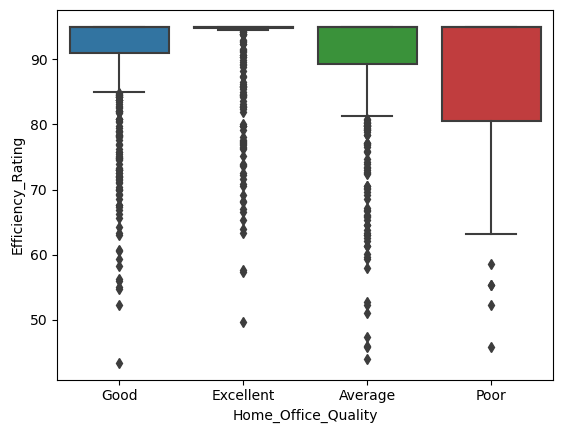

In [37]:
sns.boxplot(x='Home_Office_Quality', y='Efficiency_Rating', data=df)

**Employees working in poor-quality home office environments show significantly lower efficiency, while moving from good to excellent setups shows diminishing returns.**

In [43]:
#Manager support influences stress and satisfaction

from scipy.stats import levene
group1 = df[df['Manager_Support_Level'] == "Moderate"]['Stress_Level']
group2 = df[df['Manager_Support_Level'] == "High"]['Stress_Level']
group3 = df[df['Manager_Support_Level'] == "Very High"]['Stress_Level']
group4 = df[df['Manager_Support_Level'] == "Low"]['Stress_Level']
group5 = df[df['Manager_Support_Level'] == "Very Low"]['Stress_Level']
stat, pval = levene(group1, group2, group3, group4, group5)

print("Levene Statistic:", stat)
print("P-value:", pval)

if pval < 0.05:
    print("Variances are significantly different — assumption violated.")
else:
    print("Variances are equal — assumption met.")
    
#H₀: Manager support does NOT affect stress.
#H₁: Manager support DOES affect stress.
from scipy.stats import f_oneway
grouped_data = [group['Stress_Level'].values for name, group in df.groupby('Manager_Support_Level')]
f_stat, pval = f_oneway(*grouped_data)

print("F Statistic:", f_stat)
print("P-value:", pval)

if pval < 0.05:
    print("Manager support DOES affect stress.")
else:
    print("Manager support does NOT affect stress.")

print("--------------------------------------------------------------")
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_test = pairwise_tukeyhsd(df['Stress_Level'], df['Manager_Support_Level'], alpha=0.05)
print(tukey_test)

Levene Statistic: 0.5992608317088131
P-value: 0.6632191860557273
Variances are equal — assumption met.
F Statistic: 1.9445164136482707
P-value: 0.10065241372190868
Manager support does NOT affect stress.
--------------------------------------------------------------
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
     High       Low   -0.207 0.7824 -0.7008 0.2868  False
     High  Moderate    0.065 0.9865 -0.2837 0.4136  False
     High Very High  -0.2496 0.5144 -0.6827 0.1835  False
     High  Very Low  -0.5563 0.4775 -1.4876 0.3751  False
      Low  Moderate    0.272 0.5477 -0.2158 0.7598  False
      Low Very High  -0.0426 0.9996  -0.594 0.5088  False
      Low  Very Low  -0.3492 0.8723 -1.3411 0.6426  False
 Moderate Very High  -0.3146  0.259 -0.7409 0.1117  False
 Moderate  Very Low  -0.6213 0.3577 -1.5494 0.3069  False
Very High  Very Low  -0.3067  0.908 -

**Manager support does NOT have a statistically significant impact on employee stress levels.**

In [45]:
#Manager support influences stress and satisfaction

from scipy.stats import levene
group1 = df[df['Manager_Support_Level'] == "Moderate"]['Job_Satisfaction']
group2 = df[df['Manager_Support_Level'] == "High"]['Job_Satisfaction']
group3 = df[df['Manager_Support_Level'] == "Very High"]['Job_Satisfaction']
group4 = df[df['Manager_Support_Level'] == "Low"]['Job_Satisfaction']
group5 = df[df['Manager_Support_Level'] == "Very Low"]['Job_Satisfaction']
stat, pval = levene(group1, group2, group3, group4, group5)

print("Levene Statistic:", stat)
print("P-value:", pval)

if pval < 0.05:
    print("Variances are significantly different — assumption violated.")
else:
    print("Variances are equal — assumption met.")

#H₀: Manager support does NOT affect satisfaction.
#H₁: Manager support DOES affect satisfaction.

#As assumptions are violated will use Kruskal Wallis Test
from scipy.stats import kruskal
groups = [group['Job_Satisfaction'].values for name, group in df.groupby('Manager_Support_Level')]
stat, pval = kruskal(*groups)

print("Kruskal-Wallis Statistic:", stat)
print("P-value:", pval)

if pval < 0.05:
    print("Manager support DOES affect satisfaction.")
else:
    print("Manager support does NOT affect satisfaction.")

#Which group significantly differ?
import scikit_posthocs as sp

sp.posthoc_dunn(df, val_col='Job_Satisfaction', group_col='Manager_Support_Level', p_adjust='bonferroni')


Levene Statistic: 126.30315264668623
P-value: 5.8636029582391516e-93
Variances are significantly different — assumption violated.
Kruskal-Wallis Statistic: 539.0815651246759
P-value: 2.3559074591709783e-115
Manager support DOES affect satisfaction.


,High,Low,Moderate,Very High,Very Low
High,1.000000e+00,1.131389e-55,1.518515e-68,1.000000e+00,2.055450e-18
Low,1.131389e-55,1.000000e+00,5.384478e-03,1.495173e-43,1.000000e+00
Moderate,1.518515e-68,5.384478e-03,1.000000e+00,1.817028e-44,1.551343e-01
Very High,1.000000e+00,1.495173e-43,1.817028e-44,1.000000e+00,8.237511e-17
Very Low,2.055450e-18,1.000000e+00,1.551343e-01,8.237511e-17,1.000000e+00


**Higher manager support leads to significantly higher employee satisfaction.**

In [48]:
#Commute time affects work-life balance
df['Commute_Group'] = np.where(df['Commute_Time_Minutes'] <= 50, 'Low', 'High')

#H₀: work-life balance is same for employees with low and high commute time
#H₁: work-life balance differs based on commute time

commute_high = df[df['Commute_Group'] == "High"]['Work_Life_Balance']
commute_low = df[df['Commute_Group'] == "Low"]['Work_Life_Balance']

tstat, pval = ttest_ind(commute_high, commute_low)

print(f"tstat : {tstat}")
print(f"P value : {pval}")

if pval < 0.05:
    print("work-life balance differs based on commute time")
else:
    print("work-life balance is same for employees with low and high commute time")
    
print(f"Average Work Life balance with High Commute Time : {np.mean(commute_high)}") 
print(f"Average  Work Life balance with Low Commute Time : {np.mean(commute_low)}") 

tstat : -1.5393192534999804
P value : 0.12393756936279263
work-life balance is same for employees with low and high commute time
Average Work Life balance with High Commute Time : 5.964788732394366
Average  Work Life balance with Low Commute Time : 6.248159057437408


In [51]:
#Experience moderates productivity outcomes
df['Exp_group'] = np.where(df['Years_Experience'] <= 7, 'Low', 'High')

#H₀: Productivity is the same regardless of experience level.
#H₁: Experience impacts productivity.

exp_high = df[df['Exp_group'] == "High"]['Productivity_Score']
exp_low = df[df['Exp_group'] == "Low"]['Productivity_Score']

tstat, pval = ttest_ind(exp_high, exp_low)

print(f"tstat : {tstat}")
print(f"P value : {pval}")

if pval < 0.05:
    print("Experience impacts productivity.")
else:
    print("Productivity is the same regardless of experience level.")
    
print(f"Average Productivity For High Experienced Emps : {np.mean(exp_high)}") 
print(f"Average Productivity For High Experienced Emps : {np.mean(exp_low)}") 

tstat : 7.9160834553607105
P value : 4.732714008733157e-15
Experience impacts productivity.
Average Productivity For High Experienced Emps : 88.95218750000001
Average Productivity For High Experienced Emps : 81.50644067796611


In [55]:
#Collaboration frequency affects innovation
df.head(1)

from scipy.stats import levene
group1 = df[df['Team_Collaboration_Frequency'] == "Daily"]['Innovation_Score']
group2 = df[df['Team_Collaboration_Frequency'] == "Few times per week"]['Innovation_Score']
group3 = df[df['Team_Collaboration_Frequency'] == "Weekly"]['Innovation_Score']
group4 = df[df['Team_Collaboration_Frequency'] == "Bi-weekly"]['Innovation_Score']
group5 = df[df['Team_Collaboration_Frequency'] == "Monthly"]['Innovation_Score']
stat, pval = levene(group1, group2, group3, group4, group5)

print("Levene Statistic:", stat)
print("P-value:", pval)

if pval < 0.05:
    print("Variances are significantly different — assumption violated.")
else:
    print("Variances are equal — assumption met.")
    
    
#As assumptions are violated will use Kruskal Wallis Test
#H₀: Collaboration frequency Does not affects innovation
#H₁: Collaboration frequency affects satisfaction.
from scipy.stats import kruskal
groups = [group['Innovation_Score'].values for name, group in df.groupby('Team_Collaboration_Frequency')]
stat, pval = kruskal(*groups)

print("Kruskal-Wallis Statistic:", stat)
print("P-value:", pval)

if pval < 0.05:
    print("Collaboration frequency affects satisfaction.")
else:
    print("Collaboration frequency Does not affects satisfaction.")

#Which group significantly differ?
import scikit_posthocs as sp

sp.posthoc_dunn(df, val_col='Job_Satisfaction', group_col='Manager_Support_Level', p_adjust='bonferroni')


Levene Statistic: 2.393709932779707
P-value: 0.04871609212261139
Variances are significantly different — assumption violated.
Kruskal-Wallis Statistic: 1.3955690218543486
P-value: 0.8449647751789304
Collaboration frequency Does not affects satisfaction.


,High,Low,Moderate,Very High,Very Low
High,1.000000e+00,1.131389e-55,1.518515e-68,1.000000e+00,2.055450e-18
Low,1.131389e-55,1.000000e+00,5.384478e-03,1.495173e-43,1.000000e+00
Moderate,1.518515e-68,5.384478e-03,1.000000e+00,1.817028e-44,1.551343e-01
Very High,1.000000e+00,1.495173e-43,1.817028e-44,1.000000e+00,8.237511e-17
Very Low,2.055450e-18,1.000000e+00,1.551343e-01,8.237511e-17,1.000000e+00
